# Pre-Run Setup

### Import Libraries

In [8]:
from qiskit import *
import os
import datetime
import numpy as np
from datetime import date
#you have to load some account to start


In [9]:
import random
import os

In [11]:
#IBMQ.disable_account() 
# IBMQ.disable_account()
token0 = '316cca1ff42067b9901b6a9e90ca76496e76b4a73139954176c6fe31a45572fcd37089924cbe5c41edb96a9b4c0e92e44451ed350e2a7e45dc809d26cd752eed'
provider = IBMQ.enable_account(token0)

In [12]:
backend = provider.backends.ibmq_16_melbourne
for i in range(16):
    prop = backend.properties()
    print(prop.t2(i))

0.00010835251932340382
5.3517638263018267e-05
0.00010581004938549914
1.6678091229587116e-05
6.701038811541635e-05
3.787973391379032e-05
7.828013367591535e-05
1.409473712564431e-05
0.00018037376935097765
6.197398859857221e-05
7.788062845590807e-05
7.194717295165138e-05
6.029139187001669e-05
3.065701199746565e-05
5.819131218755027e-05


BackendPropertyError: "Couldn't find the property 'T2' for qubit 15."

### Specify the files that need to be run 
The old setup works with only one folder.

In [6]:
def shuffle_qasms(qasmlist):
    def get_time(filename):
        idgate = filename.split('/')[-1].split('_')[8].split('=')[-1]
        return idgate
    print(get_time(qasmlist[0]))
    times = list(set([get_time(x) for x in qasmlist])) #remove duplicates
    times.sort()
    print('# of time instances=%d'%(len(times)))
    random.shuffle(times) #randomize the timesteps
    print(times)
    sorted_qasm_list = []
    for time in times:
        sorted_qasm_list += [f for f in qasmlist if get_time(f) == time]
    return sorted_qasm_list

In [8]:
import glob
from datetime import date
circuitPath = r"../../../Circuits"
device = "ibmq_santiago"
datestr = "20210129"
runtypes = [f.name for f in os.scandir(circuitPath + '/' + device + '/' + datestr) if f.is_dir()]
batchFiles = []

runtypes_ordered = []
PauliStates = ['XplusState', 'XminusState','YplusState', 'YminusState']
randomStates = ['randomState%d'%(i) for i in range(5)]
for i in range(5):
    runtype = [item for item in runtypes if item.split('_')[2]==PauliStates[i%4]]
    runtypes_ordered.append(runtype[0])
    runtype = [item for item in runtypes if item.split('_')[2]==randomStates[i]]
    runtypes_ordered.append(runtype[0])
runtypes_ordered

['MeasMainqFree_Q1_XplusState_QS_ZplusState',
 'MeasMainqFree_Q1_randomState0_QS_ZplusState',
 'MeasMainqFree_Q1_XminusState_QS_ZplusState',
 'MeasMainqFree_Q1_randomState1_QS_ZplusState',
 'MeasMainqFree_Q1_YplusState_QS_ZplusState',
 'MeasMainqFree_Q1_randomState2_QS_ZplusState',
 'MeasMainqFree_Q1_YminusState_QS_ZplusState',
 'MeasMainqFree_Q1_randomState3_QS_ZplusState',
 'MeasMainqFree_Q1_XplusState_QS_ZplusState',
 'MeasMainqFree_Q1_randomState4_QS_ZplusState']

In [9]:
for runtype in runtypes_ordered:
    qasmpath = circuitPath + '/' + device + '/'+ datestr + '/' + runtype + '/'
    qasmlist = glob.glob(qasmpath + '%s*.qasm'%(runtype.split('_')[0]))
    # sort by id gates
    qasmlist.sort(key=lambda x: int(x.split('/')[-1].split('_')[8].split('=')[-1]))
    print(len(qasmlist))
    f=qasmlist[0]
    print(f)
    QuantumCircuit().from_qasm_file(f).draw(output='mpl')
    sorted_qasm_list = shuffle_qasms(qasmlist)
    # add measurement error mitigation
    meas_qasm = glob.glob(qasmpath + '%s*.qasm'%('MeasError'))
    sorted_qasm_list += meas_qasm
    print(len(sorted_qasm_list))
    batchFiles += [sorted_qasm_list]

72
../../../Circuits/ibmq_santiago/20210129/MeasMainqFree_Q1_XplusState_QS_ZplusState/MeasMainqFree_Q1_XplusState_QS_ZplusState_20210129_ibmq_santiago_numIdGates=0_obsY.qasm
0
# of time instances=24
['1080', '936', '216', '288', '648', '1584', '72', '1368', '1152', '1224', '1656', '504', '864', '576', '1512', '792', '0', '720', '360', '1008', '432', '1296', '144', '1440']
74
72
../../../Circuits/ibmq_santiago/20210129/MeasMainqFree_Q1_randomState0_QS_ZplusState/MeasMainqFree_Q1_randomState0_QS_ZplusState_20210129_ibmq_santiago_numIdGates=0_obsX.qasm
0
# of time instances=24
['1512', '864', '1440', '0', '1008', '72', '1296', '1656', '216', '432', '1080', '576', '1224', '1368', '1152', '792', '360', '288', '144', '720', '648', '936', '504', '1584']
74
72
../../../Circuits/ibmq_santiago/20210129/MeasMainqFree_Q1_XminusState_QS_ZplusState/MeasMainqFree_Q1_XminusState_QS_ZplusState_20210129_ibmq_santiago_numIdGates=0_obsX.qasm
0
# of time instances=24
['648', '792', '72', '1512', '360', '72

In [2]:
len(batchFiles)

NameError: name 'batchFiles' is not defined

../../../Circuits/ibmq_santiago/20210129/MeasMainqFree_Q1_randomState4_QS_ZplusState/MeasMainqFree_Q1_randomState4_QS_ZplusState_20210129_ibmq_santiago_numIdGates=72_obsZ.qasm


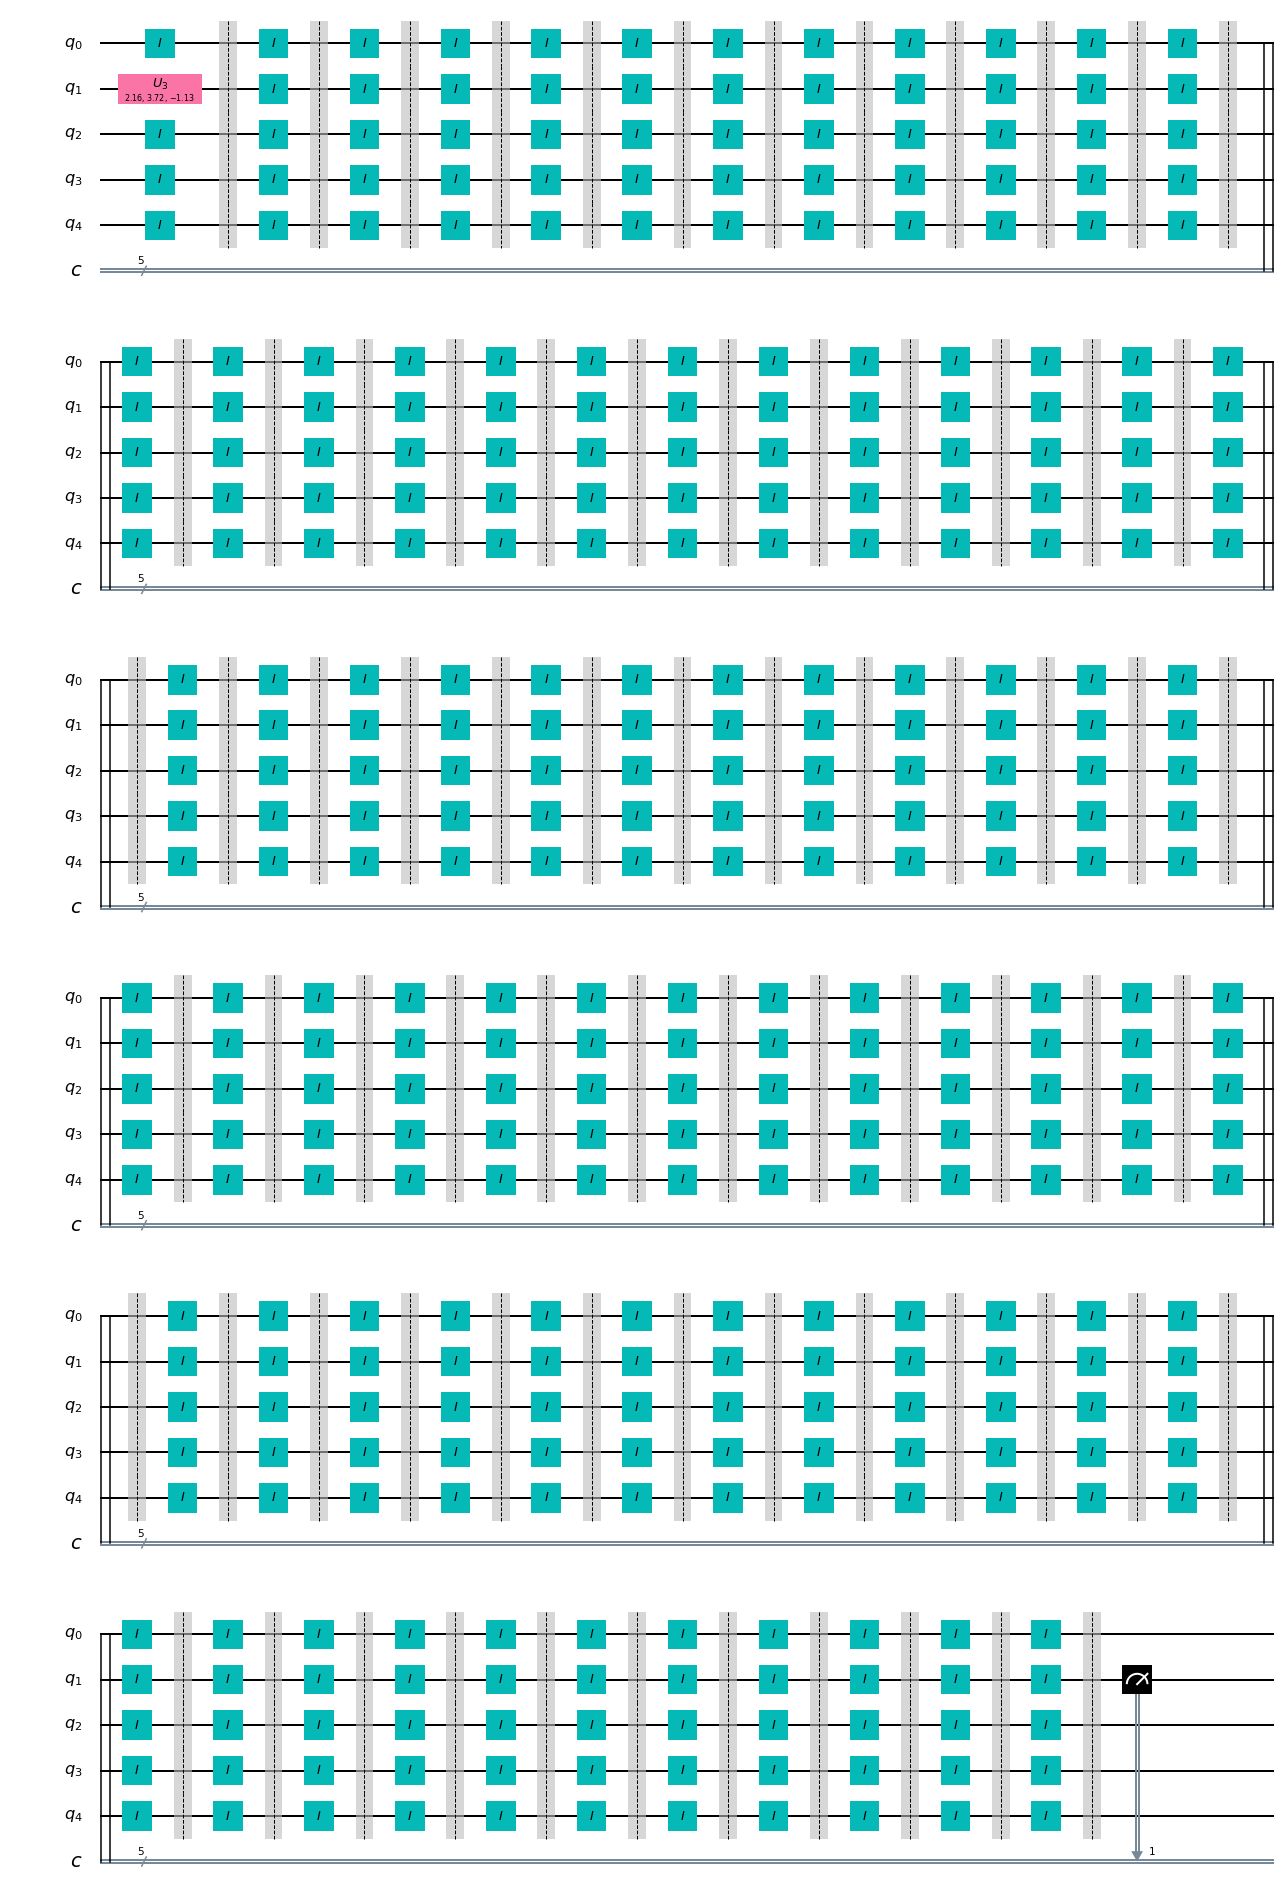

In [11]:
f=qasmlist[5]
print(f)
QuantumCircuit().from_qasm_file(f).draw(output='mpl')

In [12]:
for i in range(10):
    print(batchFiles[i][0].split('/')[-1].split('_')[2])

XplusState
randomState0
XminusState
randomState1
YplusState
randomState2
YminusState
randomState3
XplusState
randomState4


In [13]:
tokens = {'haimeng@usc.edu':'316cca1ff42067b9901b6a9e90ca76496e76b4a73139954176c6fe31a45572fcd37089924cbe5c41edb96a9b4c0e92e44451ed350e2a7e45dc809d26cd752eed',
          'zhanghaimeng1994@gmail.com':'3513ac2a5100793f7e44bf520ad54b2d7bb68da03cd0f410a3bea14853644e1841de6ce86fbee2a750f814f032584d002f601fe25360b446f81339ba3a957eed',
          'theireasychair@gmail.com':'c59327488ff0575f9fcafd3f8d8ad627a1574fcf130508ac0314f08af78afc5cc5787acd7527140cb8aeacceaf4eaf82960785df5636991287d4f086db3b7229',
          'theireasychair@icloud.com':'e009883c3a103e728b741783f67d8586a37c0de04447151aa9493d13b3e76518f135424c482d9be2ef02759194085c8dce0db926f392ef5caa5b66f2843025a3',
          'jinweixu@stanford.edu':'21a7ae9539b78959e11dcc1383c5691767f36b13d5d8efa01e515b76714b796903c19a61537adf98583e1cb04e4ee2584c6ba5f632b9a16cb8ad80cc6ce90ba7'}

### Specify API and Backend

This script checks for how many jobs are available per token.

In [15]:
#write the email address corresponding to each API, this will help when these APIs expire
apiDict = tokens
apiInv =dict(map(reversed, apiDict.items()))
apitokens = list(apiDict.values())


for token in apitokens:
    IBMQ.disable_account() #Start with no account loaded
    provider = IBMQ.enable_account(token) #Some account must be loaded before we start
    backend = provider.backends.ibmq_santiago
    available_jobs = backend.job_limit().maximum_jobs - backend.job_limit().active_jobs
    print(f"{available_jobs} jobs available for {apiInv[token]}")



5 jobs available for haimeng@usc.edu
5 jobs available for zhanghaimeng1994@gmail.com
5 jobs available for theireasychair@gmail.com
5 jobs available for theireasychair@icloud.com
5 jobs available for jinweixu@stanford.edu


In [16]:
backend.configuration() #max_experiments=75, max_shots=8192
max_experiments=backend.configuration().max_experiments
max_shots=backend.configuration().max_shots
print(max_experiments,max_shots)

75 8192


## print backend info

In [17]:
prop=backend.properties()
type(prop)

qiskit.providers.models.backendproperties.BackendProperties

# Run the circuits

### Function to import backend and token information during the runs

In [18]:
# print current working directory
print(os.getcwd())

/home/haimeng/LocalProjects/IBM-PMME/IBM_data/job_submission/20210128


In [19]:
import csv
def exportJobInfo(usertoken,jobid,filenames,backend):
    global runRecords
    now = datetime.datetime.now()
    qindex = int(filenames[0].split('/')[-1].split('_')[1][-1])
    with open(runRecords+jobid + '_' +usertoken+'.csv','w+') as f:
        writer = csv.writer(f,delimiter=',')
        writer.writerow(['token',token])
        writer.writerow(['jobid',jobid])
        writer.writerow(['backend',backend.properties().backend_name])
        writer.writerow(['qubit',qindex])
        prop = backend.properties().qubit_property(qindex)
        for key,value in prop.items():
            writer.writerow([key,value])
        writer.writerow(['circuits'])
        for item in filenames:
            writer.writerow([item])
        

In [20]:
backend_info = backend.properties().to_dict() 
backend_info['backend_name']

'ibmq_santiago'

### Function to check for available tokens

In [35]:

 
#Select a available token to send the run to
#With the current setup, loading and unloading a token takes sometime
#sequentially check each token for availability will increase loadtime for tokens that are near the end
#so given a list of tokens, everytime a job is sent to a token, that token will be sent to the end
def availableToken():
    global provider, backend, apitokens
    token = apitokens[0]
    available_jobs = backend.job_limit().maximum_jobs - backend.job_limit().active_jobs
    if available_jobs > 1:
        print(f'{available_jobs} jobs available for {apiInv[token]}')
        return token

    #if the first token has no availability then we will continue below
    apitokens.append(apitokens.pop(0))
    for token in apitokens:
        IBMQ.disable_account() 
        provider = IBMQ.enable_account(token) 
        backend = provider.backends.ibmq_santiagp
        available_jobs = backend.job_limit().maximum_jobs - backend.job_limit().active_jobs
        if available_jobs > 1:
            print(f'{available_jobs} jobs available for {apiInv[token]}')
            apitokens.insert(0, apitokens.pop(apitokens.index(token)))
            return token

availableToken()   
      

5 jobs available for theireasychair@icloud.com


'e009883c3a103e728b741783f67d8586a37c0de04447151aa9493d13b3e76518f135424c482d9be2ef02759194085c8dce0db926f392ef5caa5b66f2843025a3'

### Actually doing the runs

In [22]:
#start with empty containers
#dont run this block if you already have a list of runs you want to continue

runDict = {} #matches each batch to the job token
jobDict = {} #matches each batch to the entire job object
jobsFound = set([]) #status is updated when checked
jobsDone = set([])

In [23]:
backend.properties().backend_name

'ibmq_santiago'

In [29]:
len(batchFiles)

10

In [36]:
#start runs
#generally we want to run all the batchFiles, but we can also choose to run only some of them:
#todoFiles = [batchFiles[3]]
jobsNotFound = list(set(range(0, len(batchFiles))) - jobsFound)

# todoFiles = batchFiles[0::]
# for runFiles in todoFiles:
for n in jobsNotFound[0::]:
    try:
        runFiles = batchFiles[n]
        token = availableToken()

        allQasmList = [QuantumCircuit.from_qasm_file(file) for file in runFiles] #this needs to edited if the batch files also contain directory
        allCircuits= assemble(allQasmList, backend, shots=8192)

        job_current = backend.run(allCircuits)
        print(job_current.status())

        runId = job_current.job_id()
    #     runTokens.append(token)
    #     runIds.append(runId)
        runDict[batchFiles.index(runFiles)] = [token, runId] #note that the index still refers to the original batchFiles

        #as retrieve job is not working temporarily I will save job_current in a dictionary as well
        jobDict[batchFiles.index(runFiles)] = job_current
        print(f"Batch {batchFiles.index(runFiles)} has been sent")

        exportJobInfo(token, runId, batchFiles[0], backend)
    except:
        pass

print(runDict)

5 jobs available for theireasychair@icloud.com
JobStatus.VALIDATING
Batch 8 has been sent
4 jobs available for theireasychair@icloud.com
JobStatus.VALIDATING
Batch 9 has been sent
{0: ['316cca1ff42067b9901b6a9e90ca76496e76b4a73139954176c6fe31a45572fcd37089924cbe5c41edb96a9b4c0e92e44451ed350e2a7e45dc809d26cd752eed', '6013d08641bd12102a744d11'], 1: ['316cca1ff42067b9901b6a9e90ca76496e76b4a73139954176c6fe31a45572fcd37089924cbe5c41edb96a9b4c0e92e44451ed350e2a7e45dc809d26cd752eed', '6013d0c2e07ede8580a0a72c'], 2: ['316cca1ff42067b9901b6a9e90ca76496e76b4a73139954176c6fe31a45572fcd37089924cbe5c41edb96a9b4c0e92e44451ed350e2a7e45dc809d26cd752eed', '6013d0fc696e343ad2c4f940'], 3: ['316cca1ff42067b9901b6a9e90ca76496e76b4a73139954176c6fe31a45572fcd37089924cbe5c41edb96a9b4c0e92e44451ed350e2a7e45dc809d26cd752eed', '6013d13941bd127202744d19'], 4: ['3513ac2a5100793f7e44bf520ad54b2d7bb68da03cd0f410a3bea14853644e1841de6ce86fbee2a750f814f032584d002f601fe25360b446f81339ba3a957eed', '6013d1f835712900f4f52c

In [1]:
runDict

NameError: name 'runDict' is not defined

### Checking job status

In [ ]:
# import sleep
jobsNotDone = list(set(runDict.keys()) - jobsDone)

def loadToken(token):
    global provider, backend
    if(not IBMQ.active_account()):
        IBMQ.load_account()
    IBMQ.disable_account() 
    provider = IBMQ.enable_account(token) 
    backend = provider.backends.ibmq_santiago
    return None

print("|Batch| Q#  | Status")
for job in jobsNotDone:
#     try:
    [token, job_id] = runDict[job]
    loadToken(token)

    #get job from dictionary instead of retrieve job as that function is broken for now
#         job_data = backend.retrieve_job(job_id)
    #alternatively get job from the jobD|ict
    if job in jobDict:
        job_data = jobDict[job]
    else:
        job_data = backend.retrieve_job(job_id)
    #print(f"Batch {job} is {job_data.status()}")

    jobsFound.add(job)
    qno = '---'
    if str(job_data.status()) == 'JobStatus.QUEUED':
        #print(f'queue number is {job_data.queue_info().position}')
        qno = str(job_data.queue_info().position).zfill(3)

    if str(job_data.status()) == 'JobStatus.DONE':
        jobsDone.add(job)

    st = str(job_data.status()).split('.')[1]
    jno = str(job).zfill(3)
    print(f'| {jno} | {qno} | {st}')
#     except:
#         pass

print(f'{len(jobsFound)} jobs found: {jobsFound}')
print(f'{len(jobsDone)} jobs done: {jobsDone}')
# if some batches are showing network errors, run only those batches again
# try, excess commands above force the loop to continue even when some batches show errors

|Batch| Q#  | Status


# Exporting Data (Run after jobs have completed)

In [28]:
filename = batchFiles[0][0]
print(filename)
print(os.path.dirname(filename))
run=1
os.path.dirname(filename).replace('/Circuits/', '/Data/raw/') + f'/run{run}/' + os.path.basename(filename).split('.qasm')[0] + f'_{job_id}.txt'


../../../Circuits/ibmqx2/20210128/MeasMainqFree_Q0_XplusState_QS_ZminusState/MeasMainqFree_Q0_XplusState_QS_ZminusState_20210128_ibmqx2_numIdGates=96_obsX.qasm
../../../Circuits/ibmqx2/20210128/MeasMainqFree_Q0_XplusState_QS_ZminusState


'../../../Data/raw/ibmqx2/20210128/MeasMainqFree_Q0_XplusState_QS_ZminusState/run1/MeasMainqFree_Q0_XplusState_QS_ZminusState_20210128_ibmqx2_numIdGates=96_obsX_6013a18241bd1226dd744c00.txt'

In [30]:
resultRecords = '../../Data/records/results/'
if not os.path.exists(resultRecords):
        os.makedirs(resultRecords)

#job results are returned a list of dictionaries and they will have the same order as the order of the files in that batch
# filenames given here should also include the folder names as well
def exportBatchJob(filenames, token, job_id):
    loadToken(token)
    #job_data = backend.retrieve_job(job_id)
    if job in jobDict:
        job_data = jobDict[job]
        print('found token')
    else:
        job_data = backend.retrieve_job(job_id)
    
    with open(resultRecords + f'{job_id}_{token}_results.txt', 'w') as f:
        f.write(str(job_data.result().to_dict()))
    
    for i in range(0, len(filenames)):
        result = job_data.result().get_counts()[i]
        exportResult(token, job_id, i, filenames[i], result)
        
        
#results will be in the form of dictionary
#filename here should also include the foldernames
def exportResult(token, job_id, circNo, filename, result):
#     print(filename)
    directory = os.path.dirname(filename).replace('/Circuits/', '/Data/raw/')+ f'/run{run}/'
    file = directory + os.path.basename(filename).split('.qasm')[0] + f'_{job_id}.txt'
    if not os.path.exists(os.path.dirname(file)):
        os.makedirs(os.path.dirname(file))
        
    
    with open(file, 'w') as f:
            f.write("usertoken,jobid,circuit_number\n")
            f.write(f"{token},{job_id},{circNo}\n")
            [f.write( '"'+str(key)+'"' + ',' + str(value) + '\n') for key, value in result.items()]
    return None




In [31]:
# batchFilesFull = [ [ inputDir + f for f in batch] for batch in batchFiles] #this wont be necessary if the filename have dir
for job in list(runDict.keys()):
    [token, job_id] = runDict[job]
    #print(runDict[job])
    file = batchFiles[job][0]
    directory = os.path.dirname(file.replace('/Circuits/', '/Data/raw/'))
    if os.path.exists(directory):
        exists = os.listdir(directory)
        run = 1 + len(exists)
        print(run)
    else:
        run =1
    exportBatchJob(batchFiles[job], token, job_id)
    print(f"job {job} has been exported")

found token
job 0 has been exported
found token
job 1 has been exported
found token
job 2 has been exported
found token
job 3 has been exported
found token
job 4 has been exported
found token
job 5 has been exported
found token
job 6 has been exported
found token
job 7 has been exported
2
found token
job 8 has been exported
found token
job 9 has been exported
